In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model # This is the operative sklearn function we are using!
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [3]:
df = pd.read_csv('C:/Users/jafon\Documents/PythonMaterials/Data/NYC-FBI-2013-Data.csv')

In [4]:
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,"1,861",0,0.000,nan,0,0,0,12,2,10,0,0.000
1,Addison Town and Village,"2,577",3,0.000,nan,0,0,3,24,3,20,1,0.000
2,Akron Village,"2,846",3,0.000,nan,0,0,3,16,1,15,0,0.000
3,Albany,"97,956",791,8.000,nan,30,227,526,"4,090",705,"3,243",142,nan
4,Albion Village,"6,388",23,0.000,nan,3,4,16,223,53,165,5,nan


In [5]:
df = df.drop(['Rape\n(revised\ndefinition)1'], axis=1)


In [6]:
df.columns = ('City', 'Population', 'Violent Crime', 'Murder/Manslaughter', 'Rape', 'Robbery',
             'Aggravated Assault', 'Property Crime', 'Burglary', 'Larceny/Theft', 'Motor Vehicle Theft', 'Arson')
df.head()

,City,Population,Violent Crime,Murder/Manslaughter,Rape,Robbery,Aggravated Assault,Property Crime,Burglary,Larceny/Theft,Motor Vehicle Theft,Arson
0,Adams Village,"1,861",0,0.000,0,0,0,12,2,10,0,0.000
1,Addison Town and Village,"2,577",3,0.000,0,0,3,24,3,20,1,0.000
2,Akron Village,"2,846",3,0.000,0,0,3,16,1,15,0,0.000
3,Albany,"97,956",791,8.000,30,227,526,"4,090",705,"3,243",142,nan
4,Albion Village,"6,388",23,0.000,3,4,16,223,53,165,5,nan


In [7]:
# (fixing nan's with dummy 0 values)
df.fillna(0, inplace=True)
df.head()

,City,Population,Violent Crime,Murder/Manslaughter,Rape,Robbery,Aggravated Assault,Property Crime,Burglary,Larceny/Theft,Motor Vehicle Theft,Arson
0,Adams Village,"1,861",0,0.000,0,0,0,12,2,10,0,0.000
1,Addison Town and Village,"2,577",3,0.000,0,0,3,24,3,20,1,0.000
2,Akron Village,"2,846",3,0.000,0,0,3,16,1,15,0,0.000
3,Albany,"97,956",791,8.000,30,227,526,"4,090",705,"3,243",142,0.000
4,Albion Village,"6,388",23,0.000,3,4,16,223,53,165,5,0.000


In [8]:
df['Murder/Manslaughter'] = [int(i) for i in df['Murder/Manslaughter']]

In [9]:
df['Arson'] = [int(i) for i in df['Arson']]
df.head()

,City,Population,Violent Crime,Murder/Manslaughter,Rape,Robbery,Aggravated Assault,Property Crime,Burglary,Larceny/Theft,Motor Vehicle Theft,Arson
0,Adams Village,"1,861",0,0,0,0,0,12,2,10,0,0
1,Addison Town and Village,"2,577",3,0,0,0,3,24,3,20,1,0
2,Akron Village,"2,846",3,0,0,0,3,16,1,15,0,0
3,Albany,"97,956",791,8,30,227,526,"4,090",705,"3,243",142,0
4,Albion Village,"6,388",23,0,3,4,16,223,53,165,5,0


In [10]:
# checked value counts for all columns (except population) - appears to be no crazy values
#...just a lot of crime.

In [12]:
df = df[:348] # deleting the junk at the end of the dataframe
df.tail()

,City,Population,Violent Crime,Murder/Manslaughter,Rape,Robbery,Aggravated Assault,Property Crime,Burglary,Larceny/Theft,Motor Vehicle Theft,Arson
343,Woodbury Town,"10,685",3,0,0,2,1,541,9,529,3,0
344,Woodridge Village,829,7,0,0,0,7,17,8,9,0,0
345,Woodstock Town,"5,931",2,0,0,0,2,58,13,45,0,0
346,Yonkers,"199,134","1,036",6,25,390,615,"2,368",470,"1,662",236,10
347,Yorktown Town,"36,643",15,0,0,2,13,334,45,287,2,0


__Goals for this assignment:__
1. Create a population squared category
2. Create a PropertyCrime column ---> PropertyCrime = (alpha) + Population + Property^2 + Murder + Robbery
3. (To prepare for a later assignment): Create 0/1 categorical variables for all of the columns 
    

In [14]:
# apparently gotta fix this s**t. Coolcoolcool.
df['Population'] = df['Population'].apply(lambda x: int(x.split()[0].replace(',', '')))

In [15]:
type(df.Population[344])

numpy.int64

In [16]:
df['Population Squared'] = [i**2 for i in df['Population']]
df['Population Squared'].head()

0       3463321
1       6640929
2       8099716
3    9595377936
4      40806544
Name: Population Squared, dtype: int64

In [17]:
dffix = df[['City', 'Violent Crime', 'Murder/Manslaughter', 'Rape',
       'Robbery', 'Aggravated Assault', 'Property Crime', 'Burglary',
       'Larceny/Theft', 'Motor Vehicle Theft', 'Arson', 'Population', 
           'Population Squared']]
dffix.head()

,City,Violent Crime,Murder/Manslaughter,Rape,Robbery,Aggravated Assault,Property Crime,Burglary,Larceny/Theft,Motor Vehicle Theft,Arson,Population,Population Squared
0,Adams Village,0,0,0,0,0,12,2,10,0,0,1861,3463321
1,Addison Town and Village,3,0,0,0,3,24,3,20,1,0,2577,6640929
2,Akron Village,3,0,0,0,3,16,1,15,0,0,2846,8099716
3,Albany,791,8,30,227,526,"4,090",705,"3,243",142,0,97956,9595377936
4,Albion Village,23,0,3,4,16,223,53,165,5,0,6388,40806544


In [18]:
# creating binary columns, as was requested 

dffix['Propertybool'] = [0 if i == 0 else 1 for i in dffix['Property Crime']]
dffix['Murder/Manslaughterbool'] = [0 if i == 0 else 1 for i in dffix['Murder/Manslaughter']]
dffix['Robberybool'] = [0 if i == 0 else 1 for i in dffix['Robbery']]

c:\users\jafon\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\jafon\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
c:\users\jafon\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is 

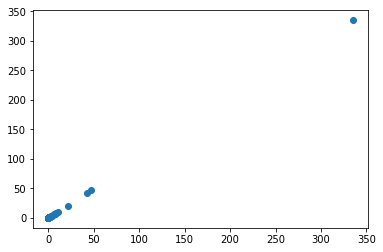

In [19]:
# Final check of the data

plt.scatter(x=dffix['Murder/Manslaughter'], y=dffix['Murder/Manslaughter'])
plt.show()

In [20]:
dffix.loc[dffix['Murder/Manslaughter'] > 300].head()

,City,Violent Crime,Murder/Manslaughter,Rape,Robbery,Aggravated Assault,Property Crime,Burglary,Larceny/Theft,Motor Vehicle Theft,Arson,Population,Population Squared,Propertybool,Murder/Manslaughterbool,Robberybool
216,New York,"52,384",335,"1,112","19,170","31,767","141,971","16,606","117,931","7,434",0,8396126,70494931807876,1,1,1


In [22]:
# It appears that the murder rate for NYC pushes all of the data to the left
# Have to adjust on a per capita analysis
# Here I am doing it per 10000 people

dffix['Murderper10k'] = (dffix['Murder/Manslaughter'] / (dffix['Population'] / 10000))
dffix.head()

c:\users\jafon\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,City,Violent Crime,Murder/Manslaughter,Rape,Robbery,Aggravated Assault,Property Crime,Burglary,Larceny/Theft,Motor Vehicle Theft,Arson,Population,Population Squared,Propertybool,Murder/Manslaughterbool,Robberybool,Murderper10k
0,Adams Village,0,0,0,0,0,12,2,10,0,0,1861,3463321,1,0,1,0.000
1,Addison Town and Village,3,0,0,0,3,24,3,20,1,0,2577,6640929,1,0,1,0.000
2,Akron Village,3,0,0,0,3,16,1,15,0,0,2846,8099716,1,0,1,0.000
3,Albany,791,8,30,227,526,"4,090",705,"3,243",142,0,97956,9595377936,1,1,1,0.817
4,Albion Village,23,0,3,4,16,223,53,165,5,0,6388,40806544,1,0,1,0.000


c:\users\jafon\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


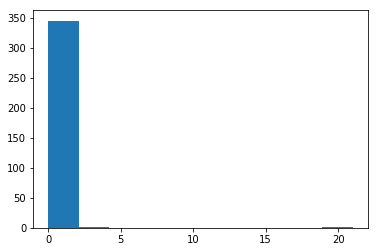

In [23]:
# Meh, that pushed everything down in a linear fashion. Let's try loggin it #lumberjacktime
dffix['Murderlogfxn'] = (dffix['Murder/Manslaughter'] / np.log(dffix['Population']))

plt.hist(dffix['Murderlogfxn'])
plt.show()


In [ ]:
dffix['LogMurder'] = []
try:
    dffix['LogMurder'].append(np.log(dffix['Murder/Manslaughter']) / dffix['Population'])
except ValueError:
    dffix['LogMurder'].append(0)

In [44]:
dffix['LogMurder'] = (np.log(dffix['Murder/Manslaughter']) / dffix['Population'])


c:\users\jafon\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
c:\users\jafon\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [45]:
dffix['LogMurder'] = [0 if x == float('-inf') else x for x in dffix['LogMurder']]

c:\users\jafon\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


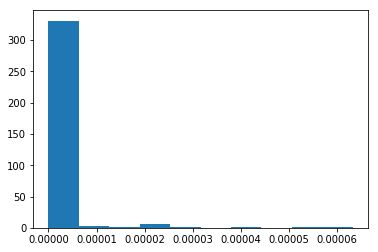

In [32]:
plt.hist(dffix['LogMurder'])
plt.show()

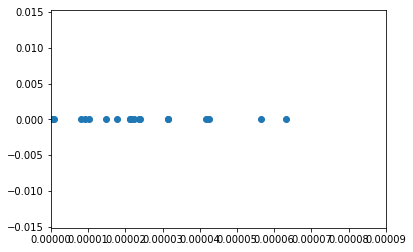

In [35]:
plt.scatter(x=dffix['LogMurder'], y=dffix['LogMurder'])
plt.xlim(0, 0.00009)
plt.show()

In [36]:
dffix.head()

,City,Violent Crime,Murder/Manslaughter,Rape,Robbery,Aggravated Assault,Property Crime,Burglary,Larceny/Theft,Motor Vehicle Theft,Arson,Population,Population Squared,Propertybool,Murder/Manslaughterbool,Robberybool,Murderper10k,Murderlogfxn,LogMurder
0,Adams Village,0,0,0,0,0,12,2,10,0,0,1861,3463321,1,0,1,0.000,0.000,0.000
1,Addison Town and Village,3,0,0,0,3,24,3,20,1,0,2577,6640929,1,0,1,0.000,0.000,0.000
2,Akron Village,3,0,0,0,3,16,1,15,0,0,2846,8099716,1,0,1,0.000,0.000,0.000
3,Albany,791,8,30,227,526,"4,090",705,"3,243",142,0,97956,9595377936,1,1,1,0.817,0.696,0.000
4,Albion Village,23,0,3,4,16,223,53,165,5,0,6388,40806544,1,0,1,0.000,0.000,0.000


In [46]:
dffix['LogMurder'] *= 100000 # trying to scale it back to something useful

# Also, don't run this more than once, or it will keep multiplying
# you'll have to go to the dataseries definition to reset it

c:\users\jafon\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [47]:
dffix.head()

,City,Violent Crime,Murder/Manslaughter,Rape,Robbery,Aggravated Assault,Property Crime,Burglary,Larceny/Theft,Motor Vehicle Theft,Arson,Population,Population Squared,Propertybool,Murder/Manslaughterbool,Robberybool,Murderper10k,Murderlogfxn,LogMurder
0,Adams Village,0,0,0,0,0,12,2,10,0,0,1861,3463321,1,0,1,0.000,0.000,0.000
1,Addison Town and Village,3,0,0,0,3,24,3,20,1,0,2577,6640929,1,0,1,0.000,0.000,0.000
2,Akron Village,3,0,0,0,3,16,1,15,0,0,2846,8099716,1,0,1,0.000,0.000,0.000
3,Albany,791,8,30,227,526,"4,090",705,"3,243",142,0,97956,9595377936,1,1,1,0.817,0.696,2.123
4,Albion Village,23,0,3,4,16,223,53,165,5,0,6388,40806544,1,0,1,0.000,0.000,0.000


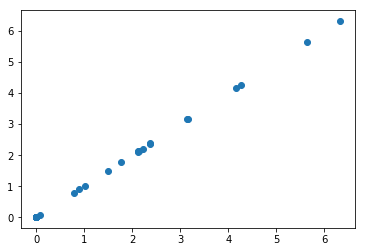

In [48]:
plt.scatter(x=dffix['LogMurder'], y=dffix['LogMurder'])
plt.show()

In [ ]:
# like buttah